### 进行barplot柱状图绘制
柱状图绘制参考[这篇博客](https://zhuanlan.zhihu.com/p/183877990)

要分清柱状图和直方图的差异，直方图是连续变量的分布，柱状图是离散的

In [3]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令


In [4]:
import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

sns.set_theme(style="white",font='Times New Roman')

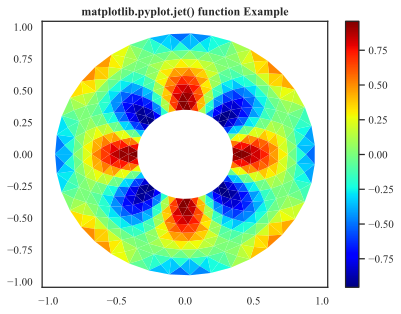

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.tri as tri 
import numpy as np  
        
ang = 40
rad = 10
radm = 0.35
radii = np.linspace(radm, 0.95, rad) 
        
angles = np.linspace(0, 4 * np.pi, ang) 
angles = np.repeat(angles[..., np.newaxis], rad, axis = 1) 
angles[:, 1::2] += np.pi / ang 
        
x = (radii * np.cos(angles)).flatten() 
y = (radii * np.sin(angles)).flatten() 
z = (np.sin(4 * radii) * np.cos(4 * angles)).flatten() 
        
triang = tri.Triangulation(x, y) 
triang.set_mask(np.hypot(x[triang.triangles].mean(axis = 1), 
                         y[triang.triangles].mean(axis = 1)) 
                       < radm) 
        
tpc = plt.tripcolor(triang, z, shading ='flat') 
plt.colorbar(tpc) 
plt.jet() 
plt.title('matplotlib.pyplot.jet() function Example',   
                                  fontweight ="bold") 
plt.show() 

### 读取yale 的对比结果

In [30]:
# mapping experiments and mapping color
mapping_exp = {
    # 'PhiTrans+': "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0", 
               'PhiTrans': "new_PhiTrans_tileAll_twice1000_0abmil_0sel", 
               'PMIL-Cosine': "new_PMIL_Cosine_1insteval_tileAll_twice1000",
               "PMIL-Euclidean": "new_PMIL_Euclidean_1insteval_tileAll_twice1000",
               "CLAM-B8":  "CLAM_k8_tileAll", 
               "CLAM-B32": "CLAM_k32_tileAll", 
               "ABMIL": "ABMIL_tileAll", 
               "TRANS": "Transformer_tile5k"}

mapping_color = {
    # 'PhiTrans+': "#BC4CAB", 
    'PhiTrans': "#CD79C0", 'PMIL-Cosine': "#dd91b8", "PMIL-Euclidean": "#F4CEDD",
                "CLAM-B8":  "#B6C9D8", "CLAM-B32": "#C5B5E6", "ABMIL": "#C7C826", "TRANS": "#799f80"}

In [32]:
root_path = "/home/cyyan/Projects/HER2proj/models/Yale/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:, 3:]
    eval_res.insert(0, column="method", value=exp_re)

    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "Yale_sota_comparison.csv"))


/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PMIL_Cosine_1insteval_tileAll_twice1000
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PMIL_Euclidean_1insteval_tileAll_twice1000
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/CLAM_k8_tileAll
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/CLAM_k32_tileAll
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/ABMIL_tileAll
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/Transformer_tile5k


,method,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
25,PhiTrans,0.825625,0.818947,0.815269,19.0,0.832496,0.818947,0.819560,19.0,0.818947,0.829061,0.818947,0.817415,38.0,0.829061,0.818947,0.817415,38.0,0.818947,0.892742
26,PhiTrans,0.062550,0.122569,0.063968,0.0,0.093092,0.080511,0.048094,0.0,0.052807,0.052514,0.052807,0.053588,0.0,0.052514,0.052807,0.053588,0.0,0.052807,0.041184
25,PMIL-Cosine,0.798736,0.797895,0.795902,19.0,0.799849,0.793684,0.793892,19.0,0.795789,0.799292,0.795789,0.794897,38.0,0.799292,0.795789,0.794897,38.0,0.795789,0.873463
26,PMIL-Cosine,0.079920,0.089474,0.073413,0.0,0.080128,0.100690,0.080379,0.0,0.074153,0.073249,0.074153,0.075202,0.0,0.073249,0.074153,0.075202,0.0,0.074153,0.057779
25,PMIL-Euclidean,0.808967,0.793684,0.798147,19.0,0.805624,0.812632,0.806173,19.0,0.803158,0.807296,0.803158,0.802160,38.0,0.807296,0.803158,0.802160,38.0,0.803158,0.877230
26,PMIL-Euclidean,0.069955,0.118587,0.086607,0.0,0.091436,0.072992,0.068356,0.0,0.075250,0.073592,0.075250,0.076280,0.0,0.073592,0.075250,0.076280,0.0,0.075250,0.063242
25,CLAM-B8,0.743111,0.821053,0.776882,19.0,0.803048,0.707368,0.747474,19.0,0.764211,0.773079,0.764211,0.762178,38.0,0.773079,0.764211,0.762178,38.0,0.764211,0.818837
26,CLAM-B8,0.086759,0.093659,0.073131,0.0,0.089574,0.114788,0.085797,0.0,0.076903,0.077827,0.076903,0.077590,0.0,0.077827,0.076903,0.077590,0.0,0.076903,0.073607
25,CLAM-B32,0.749822,0.823158,0.782131,19.0,0.806874,0.717895,0.755531,19.0,0.770526,0.778348,0.770526,0.768831,38.0,0.778348,0.770526,0.768831,38.0,0.770526,0.819834
26,CLAM-B32,0.085923,0.089731,0.073260,0.0,0.086404,0.110485,0.083196,0.0,0.076164,0.076777,0.076164,0.076672,0.0,0.076777,0.076164,0.076672,0.0,0.076164,0.070244


### 下面是HEROHE dataset结果

In [23]:
# mapping experiments and mapping color
mapping_exp = {
    # 'PhiTrans+': "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0", 
               'PhiTrans': "new_PhiTrans_align_sim_tile5ktwice500", 
               'PMIL-Cosine': "new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval",
               "PMIL-Euclidean": "new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval",
               "CLAM-B8":  "new_CLAM_8", 
               "CLAM-B32": "new_CLAM", 
               "ABMIL": "new_ABMIL_tile5k_all", 
               "TRANS": "new_Transformer"}

mapping_color = {
    # 'PhiTrans+': "#BC4CAB", 
    'PhiTrans': "#CD79C0", 'PMIL-Cosine': "#dd91b8", "PMIL-Euclidean": "#F4CEDD",
                "CLAM-B8":  "#B6C9D8", "CLAM-B32": "#C5B5E6", "ABMIL": "#C7C826", "TRANS": "#799f80"}

In [24]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:-1, 3:]
    eval_res.insert(0, column="method", value=exp_re)

    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "Yale_prototype_ablation.csv"))


/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_CLAM_8
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_CLAM
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ABMIL_tile5k_all
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_Transformer


,method,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
5,PhiTrans,0.860812,0.644444,0.733621,90.0,0.613045,0.836667,0.705573,60.0,0.721333,0.736928,0.740556,0.719597,150.0,0.761705,0.721333,0.722402,150.0,0.740556,0.795481
5,PMIL-Cosine,0.855806,0.604444,0.704134,90.0,0.591819,0.843333,0.692659,60.0,0.700000,0.723813,0.723889,0.698396,150.0,0.750211,0.700000,0.699544,150.0,0.723889,0.773333
5,PMIL-Euclidean,0.843340,0.597778,0.698602,90.0,0.579082,0.830000,0.681650,60.0,0.690667,0.711211,0.713889,0.690126,150.0,0.737637,0.690667,0.691821,150.0,0.713889,0.753778
5,CLAM-B8,0.810569,0.528889,0.639371,90.0,0.535308,0.813333,0.645365,60.0,0.642667,0.672938,0.671111,0.642368,150.0,0.700464,0.642667,0.641769,150.0,0.671111,0.709074
5,CLAM-B32,0.798866,0.524444,0.632311,90.0,0.528795,0.800000,0.636337,60.0,0.634667,0.663830,0.662222,0.634324,150.0,0.690838,0.634667,0.633921,150.0,0.662222,0.706593
5,ABMIL,0.812314,0.553333,0.657553,90.0,0.546440,0.806667,0.651190,60.0,0.654667,0.679377,0.680000,0.654372,150.0,0.705965,0.654667,0.655008,150.0,0.680000,0.724259
5,TRANS,0.777097,0.564444,0.648729,90.0,0.528135,0.740000,0.612382,60.0,0.634667,0.652616,0.652222,0.630556,150.0,0.677512,0.634667,0.634190,150.0,0.652222,0.683333


#### 下面是读取每个exp实验下的所有times结果，包含了每个times下所有test样本的预测probs

In [6]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "split_latest_test_0_results.csv"


exp_name = "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0"

for tidx in range(5):
    eval_res = pd.read_csv(os.path.join(root_path, exp_name, f"time{tidx}", filename))

eval_res

,Unnamed: 0,slide_id,prob_neg,prob_pos,label
0,0,70,0.586282,0.413718,1
1,1,71,0.169325,0.830675,1
2,2,72,0.068303,0.931697,1
3,3,73,0.835213,0.164787,1
4,4,74,0.265534,0.734466,1
...,...,...,...,...,...
145,145,347,0.861022,0.138978,1
146,146,348,0.181016,0.818984,1
147,147,349,0.713360,0.286640,1
148,148,350,0.136423,0.863577,1


#### 下面是直接读取每个exp实验下的summay csv文件

In [7]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

exp_name = "new_PhiTrans_align_sim+tile5ktwice500_abmilsel0"

eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))

eval_res

,Unnamed: 0,time,fold,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,...,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
0,0,0.000000,0.0,0.842857,0.655556,0.737500,90.0,0.612500,0.816667,0.700000,...,0.727679,0.736111,0.718750,150.0,0.750714,0.720000,0.722500,150.0,0.736111,0.799630
1,1,1.000000,0.0,0.849315,0.688889,0.760736,90.0,0.636364,0.816667,0.715328,...,0.742839,0.752778,0.738032,150.0,0.764134,0.740000,0.742573,150.0,0.752778,0.832407
2,2,2.000000,0.0,0.842857,0.655556,0.737500,90.0,0.612500,0.816667,0.700000,...,0.727679,0.736111,0.718750,150.0,0.750714,0.720000,0.722500,150.0,0.736111,0.775370
3,3,3.000000,0.0,0.892857,0.555556,0.684932,90.0,0.574468,0.900000,0.701299,...,0.733663,0.727778,0.693115,150.0,0.765502,0.693333,0.691478,150.0,0.727778,0.822222
4,4,4.000000,0.0,0.852459,0.577778,0.688742,90.0,0.573034,0.850000,0.684564,...,0.712746,0.713889,0.686653,150.0,0.740689,0.686667,0.687071,150.0,0.713889,0.795926
5,mean,2.000000,0.0,0.856069,0.626667,0.721882,90.0,0.601773,0.840000,0.700238,...,0.728921,0.733333,0.711060,150.0,0.754351,0.712000,0.713224,150.0,0.733333,0.805111
6,std,1.581139,0.0,0.020983,0.056982,0.033396,0.0,0.027378,0.036515,0.010893,...,0.010965,0.014164,0.020997,0.0,0.010406,0.021807,0.023401,0.0,0.014164,0.022565


In [8]:
print(eval_res.columns[3:])
# print(eval_res.iloc[5,:][3:])

tb_barplot = eval_res.loc[:, ['neg_f1-score', 'pos_f1-score', 
                'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score',
                'balanced acc', 'auc']]
tb_barplot

Index(['neg_precision', 'neg_recall', 'neg_f1-score', 'neg_support',
       'pos_precision', 'pos_recall', 'pos_f1-score', 'pos_support',
       'accuracy', 'macro avg_precision', 'macro avg_recall',
       'macro avg_f1-score', 'macro avg_support', 'weighted avg_precision',
       'weighted avg_recall', 'weighted avg_f1-score', 'weighted avg_support',
       'balanced acc', 'auc'],
      dtype='object')


,neg_f1-score,pos_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,balanced acc,auc
0,0.737500,0.700000,0.750714,0.720000,0.722500,0.736111,0.799630
1,0.760736,0.715328,0.764134,0.740000,0.742573,0.752778,0.832407
2,0.737500,0.700000,0.750714,0.720000,0.722500,0.736111,0.775370
3,0.684932,0.701299,0.765502,0.693333,0.691478,0.727778,0.822222
4,0.688742,0.684564,0.740689,0.686667,0.687071,0.713889,0.795926
5,0.721882,0.700238,0.754351,0.712000,0.713224,0.733333,0.805111
6,0.033396,0.010893,0.010406,0.021807,0.023401,0.014164,0.022565


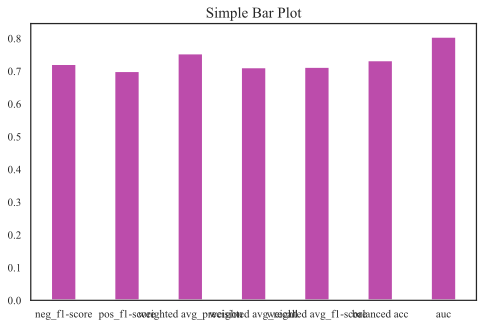

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(
    x=tb_barplot.columns,  # Matplotlib自动将非数值变量转化为x轴坐标
    height=tb_barplot.iloc[5,:],  # 柱子高度，y轴坐标
    width=0.4,  # 柱子宽度，默认0.8，两根柱子中心的距离默认为1.0
    align="center",  # 柱子的对齐方式，'center' or 'edge'
    color="#BC4CAB",  # 柱子颜色
    edgecolor=None,  # 柱子边框的颜色
    linewidth=2.0  # 柱子边框线的大小
)
ax.set_title("Simple Bar Plot", fontsize=15)
ax.set_facecolor("white")

# xticks = ax.get_xticks()
# for i in range(len(tb_barplot.iloc[5,:])):
#     xy = (xticks[i], tb_barplot.iloc[5,:][i] * 1.03)
#     s = str(tb_barplot.iloc[5,:][i])
#     ax.annotate(
#         text=s,  # 要添加的文本
#         xy=xy,  # 将文本添加到哪个位置
#         fontsize=12,  # 标签大小
#         color="blue",  # 标签颜色
#         ha="center",  # 水平对齐
#         va="baseline"  # 垂直对齐
#     )


>>>>>>>>>>>>>>>>>>>>>>>PhiTrans: new_PhiTrans_align_sim_tile5ktwice500
#CD79C0
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Cosine: new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval
#dd91b8
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Euclidean: new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval
#F4CEDD
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B8: new_CLAM_8
#B6C9D8
>>>>>>>>>>>>>>>>>>>>>>>CLAM-B32: new_CLAM
#C5B5E6
>>>>>>>>>>>>>>>>>>>>>>>ABMIL: new_ABMIL_tile5k_all
#C7C826
>>>>>>>>>>>>>>>>>>>>>>>TRANS: new_Transformer
#799f80


[Text(0.35, 0, 'neg_f1-score'),
 Text(1.35, 0, 'pos_f1-score'),
 Text(2.35, 0, 'weighted avg_precision'),
 Text(3.35, 0, 'weighted avg_recall'),
 Text(4.35, 0, 'weighted avg_f1-score'),
 Text(5.35, 0, 'balanced acc'),
 Text(6.35, 0, 'auc')]

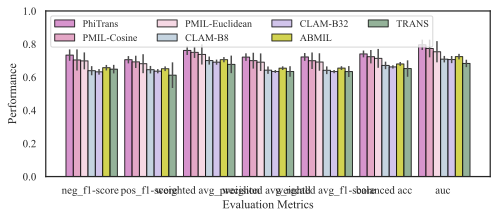

In [28]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


bar_data_mean = {}
bar_data_std = {}
for one_exp in mapping_exp.keys():
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['neg_f1-score', 'pos_f1-score', 
                'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score',
                'balanced acc', 'auc']]
    
    bar_row_names = tb_barplot.columns

    bar_data_mean.update({one_exp:tb_barplot.iloc[5,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[6,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(8, 3))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.125
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
           edgecolor="black",  # 柱子边框的颜色    
           linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.00],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc="upper left", ncols=4, fontsize='small', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.35)
ax.set_xticklabels(bar_row_names)

>>>>>>>>>>>>>>>>>>>>>>>PhiTrans: new_PhiTrans_align_sim_tile5ktwice500
#CD79C0
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Cosine: new_ProtoMIL_sim_Cosine_mean_tileAlltwice500_0insteval
#dd91b8
>>>>>>>>>>>>>>>>>>>>>>>PMIL-Euclidean: new_ProtoMIL_sim_Euclidean_mean_tile5ktwice500_0insteval
#F4CEDD


[Text(0.25, 0, 'neg_F1'),
 Text(1.25, 0, 'pos_F1'),
 Text(2.25, 0, 'wPRC'),
 Text(3.25, 0, 'wREC'),
 Text(4.25, 0, 'wF1'),
 Text(5.25, 0, 'bACC'),
 Text(6.25, 0, 'AUC')]

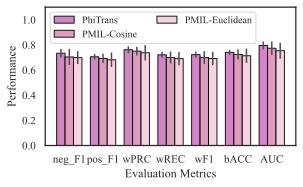

In [50]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


bar_data_mean = {}
bar_data_std = {}
for one_exp in list(mapping_exp.keys())[:3]:
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['neg_f1-score', 'pos_f1-score', 
                'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score',
                'balanced acc', 'auc']]
    
    bar_row_names = tb_barplot.columns
    bar_row_names = ['neg_F1', 'pos_F1', 'wPRC', 'wREC', 'wF1', 'bACC', 'AUC']

    bar_data_mean.update({one_exp:tb_barplot.iloc[5,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[6,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(4.5,2.5))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.25
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.9,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
           edgecolor="black",  # 柱子边框的颜色    
           linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.10],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc="upper left", ncols=2, fontsize='small', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(bar_row_names)

>>>>>>>>>>>>>>>>>>>>>>>CLAM-B8: new_CLAM_8
#B6C9D8
>>>>>>>>>>>>>>>>>>>>>>>ABMIL: new_ABMIL_tile5k_all
#C7C826
>>>>>>>>>>>>>>>>>>>>>>>TRANS: new_Transformer
#799f80


[Text(0.25, 0, 'neg_F1'),
 Text(1.25, 0, 'pos_F1'),
 Text(2.25, 0, 'wPRC'),
 Text(3.25, 0, 'wREC'),
 Text(4.25, 0, 'wF1'),
 Text(5.25, 0, 'bACC'),
 Text(6.25, 0, 'AUC')]

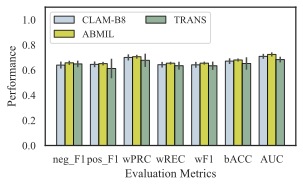

In [49]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"


bar_data_mean = {}
bar_data_std = {}

selection_exp = [list(mapping_exp.keys())[3]] + list(mapping_exp.keys())[5:]
for one_exp in selection_exp:
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['neg_f1-score', 'pos_f1-score', 
                'weighted avg_precision', 'weighted avg_recall', 'weighted avg_f1-score',
                'balanced acc', 'auc']]
    
    
    bar_row_names = tb_barplot.columns
    bar_row_names = ['neg_F1', 'pos_F1', 'wPRC', 'wREC', 'wF1', 'bACC', 'AUC']

    bar_data_mean.update({one_exp:tb_barplot.iloc[5,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[6,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(4.5,2.5))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.25
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
           edgecolor="black",  # 柱子边框的颜色    
           linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.10],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc="upper left", ncols=2, fontsize='small', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(bar_row_names)

In [68]:
list(mapping_color)[1]

'PMIL-Cosine'